# Matrix Multiplication from Scratch

The objective is for kurian to implement matrix multiplication from scratch

In [59]:
import pickle
import gzip
import urllib.request
from pathlib import Path
from itertools import islice

import torch
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=140, precision=2)

## Getting data, visualizing and chunking into 28*28

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
data_path = Path("../data")
data_path.mkdir(exist_ok=True)

In [3]:
data_gz = data_path/'mnist.pkl.gz'

In [4]:
urllib.request.urlretrieve(MNIST_URL, data_gz)

(PosixPath('../data/mnist.pkl.gz'),
 <http.client.HTTPMessage at 0x7fd1f6382310>)

In [5]:
[x for x in data_path.iterdir()]

[PosixPath('../data/mnist.pkl.gz')]

In [6]:
with gzip.open(data_gz, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin1')

In [7]:
img1 = list(x_train[100])

In [8]:
# for i in range(784):
#     print(i)

In [9]:
len(img1)/28

28.0

In [10]:
def chunks(item, c_size):
    for i in range(len(item)//c_size):
        yield item[i*c_size:i*c_size+c_size]

In [11]:
len(list(chunks(img1, 28)))

28

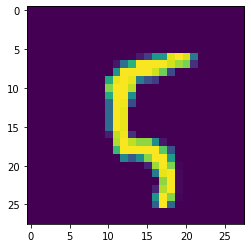

In [12]:
plt.imshow(list(chunks(img1, 28)))

In [13]:
vals = iter(img1)
islice(vals, 28)

In [14]:
list(islice(vals, 28))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [15]:
class Matrix:
    def __init__(self, item: list):
        self.item = item
    def __getitem__(self, index: list):
        return self.item[index[0]][index[1]]
    
    def __len__(self):
        print(len(self.item[0]))
        return len(self.item)

In [16]:
x = [[1,2,3], [4,5,6]]
y  = [[1,2], [3,4],[5,6]]

In [17]:
a1 = Matrix(x)
a1[0,2]

3

In [18]:
len(a1)

3


2

In [19]:
a2= Matrix(y)

In [20]:
len(a2)

2


3

In [21]:
(x_train, y_train, x_valid, y_valid) = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [22]:
x_train.shape

torch.Size([50000, 784])

In [23]:
x_valid.shape

torch.Size([10000, 784])

In [24]:
x_train.reshape((-1,28,28))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [25]:
x_train.reshape((50000,28,28)).shape

torch.Size([50000, 28, 28])

In [26]:
y_train.shape

torch.Size([50000])

In [27]:
weight = torch.randn(784, 10)
weight.shape

torch.Size([784, 10])

In [32]:
x_train[0,0]*weight[0,3]

tensor(0.)

In [55]:
x_sample = x_train[:50]

In [62]:
i, j = x_sample.shape
j, k= weight.shape
res = torch.zeros(i, k)
res.shape

torch.Size([50, 10])

In [63]:
%%time
for a in range(i):
    for b in range(j):
        for c in range(k):
            # print(x_train[a,b])
            res[a,c] += x_sample[a,b]*weight[b,c]

CPU times: user 5.26 s, sys: 3.95 ms, total: 5.27 s
Wall time: 5.26 s


In [64]:
res

tensor([[-7.34e+00,  5.02e-01, -1.66e+00, -1.41e+01,  3.64e+00,  8.64e+00, -1.04e+01, -1.80e+01,  9.76e+00,  1.52e+01],
        [ 2.20e+00,  7.10e+00, -1.08e+00, -1.43e+01, -1.11e+01, -1.95e+00, -1.67e+01,  1.48e+01,  1.46e+01,  7.95e+00],
        [ 1.85e+00, -5.52e+00,  2.29e+00,  9.31e+00,  6.94e-01,  1.62e+01, -5.26e+00, -4.01e+00,  1.57e+01, -9.32e+00],
        [-5.23e+00, -1.18e+01, -4.14e-01, -3.82e+00, -1.60e+01, -2.43e+00, -3.97e+00, -9.43e+00,  1.38e+00,  8.60e+00],
        [-9.99e+00, -5.23e-01,  2.14e+01, -1.65e+01, -5.07e+00,  1.35e+01,  3.67e+00, -1.84e+01, -7.43e+00,  1.07e+01],
        [-4.29e+00, -9.85e+00,  1.33e+01, -4.82e+00, -1.40e+01,  2.80e+00, -7.95e+00, -1.02e+01,  1.26e+00,  8.63e+00],
        [-1.46e+01, -1.06e+00,  1.20e+00, -9.86e+00,  3.33e+00,  1.25e+00, -1.53e-01, -3.64e+00, -2.94e+00,  1.17e+01],
        [-1.16e+01, -3.45e+00,  5.31e+00, -9.35e+00,  1.53e+00, -2.53e+00, -2.29e+01, -2.44e+00,  1.93e+01,  2.10e+01],
        [-9.56e+00,  1.09e+00,  7.91e-02

### Resume

From https://youtu.be/6StU6UtZEbU?t=4900

Dot product optimization

In [60]:
%%time
for a in range(i):
    for c in range(k):
        # print(x_train[a,b])
        res[a,c] = (x_sample[a,:]*weight[:,c]).sum()

CPU times: user 23.1 ms, sys: 0 ns, total: 23.1 ms
Wall time: 21.1 ms


In [61]:
res

tensor([[-7.34e+00,  5.02e-01, -1.66e+00, -1.41e+01,  3.64e+00,  8.64e+00, -1.04e+01, -1.80e+01,  9.76e+00,  1.52e+01],
        [ 2.20e+00,  7.10e+00, -1.08e+00, -1.43e+01, -1.11e+01, -1.95e+00, -1.67e+01,  1.48e+01,  1.46e+01,  7.95e+00],
        [ 1.85e+00, -5.52e+00,  2.29e+00,  9.31e+00,  6.94e-01,  1.62e+01, -5.26e+00, -4.01e+00,  1.57e+01, -9.32e+00],
        [-5.23e+00, -1.18e+01, -4.14e-01, -3.82e+00, -1.60e+01, -2.43e+00, -3.97e+00, -9.43e+00,  1.38e+00,  8.60e+00],
        [-9.99e+00, -5.23e-01,  2.14e+01, -1.65e+01, -5.07e+00,  1.35e+01,  3.67e+00, -1.84e+01, -7.43e+00,  1.07e+01],
        [-4.29e+00, -9.85e+00,  1.33e+01, -4.82e+00, -1.40e+01,  2.80e+00, -7.95e+00, -1.02e+01,  1.26e+00,  8.63e+00],
        [-1.46e+01, -1.06e+00,  1.20e+00, -9.86e+00,  3.33e+00,  1.25e+00, -1.53e-01, -3.64e+00, -2.94e+00,  1.17e+01],
        [-1.16e+01, -3.45e+00,  5.31e+00, -9.35e+00,  1.53e+00, -2.53e+00, -2.29e+01, -2.44e+00,  1.93e+01,  2.10e+01],
        [-9.56e+00,  1.09e+00,  7.91e-02